# Numeros Primos

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import time

## ¿Es primo?

In [2]:
def is_prime1(n: int) -> bool:
    if n == 1:
        return False

    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % (2*x + 1) for x in range(1, int(n_s / 2) + 1)]

    for i in range (len(seq)):
        if seq[i] == 0:
            return False

    return True

In [3]:
def is_prime2(n: int) -> bool:
    if n == 1:
        return False
    
    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % x for x in range(2, int(n_s) + 1)]
    #print(len(seq))

    seq = np.array(seq)

    seq = np.where(seq == 0, 1, 0)

    if sum(seq) >= 1:
        return False
    else:
        return True

In [4]:
def is_prime3(n: int) -> bool:
    if n == 1:
        return False
    
    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % (2*x + 1) for x in range(1, int(n_s/2) + 1)]
    #print(len(seq))
    
    seq = np.array(seq)

    seq = np.where(seq == 0, 1, 0)

    if sum(seq) >= 1:
        return False
    else:
        return True

In [5]:
is_prime1(57)

False

In [6]:
is_prime2(57)

False

In [7]:
is_prime3(57)

False

### Pruebas de eficiencia

In [8]:
x = 100

In [9]:
%%time
for i in range(1, x + 1):
    is_prime1(i)

CPU times: user 73 µs, sys: 66 µs, total: 139 µs
Wall time: 140 µs


In [10]:
%%time
for i in range(1, x + 1):
    is_prime2(i)

CPU times: user 289 µs, sys: 259 µs, total: 548 µs
Wall time: 553 µs


In [11]:
%%time
for i in range(1, x + 1):
    is_prime3(i)

CPU times: user 237 µs, sys: 210 µs, total: 447 µs
Wall time: 451 µs


Iniciamos las pruebas de eficiencia y grafico comparativo

In [12]:
ns = 10
nf = 100

n_step = 5

In [13]:
t1 = []
for i in range(ns, nf, n_step):
    ts1 = time.time_ns()
    is_prime1(i)
    tf1 = time.time_ns() - ts1
    t1.append(tf1)

In [14]:
t2 = []
for i in range(ns, nf, n_step):
    ts2 = time.time_ns()
    is_prime2(i)
    tf2 = time.time_ns() - ts2
    t2.append(tf2)

In [15]:
t3 = []
for i in range(ns, nf, n_step):
    ts3 = time.time_ns()
    is_prime3(i)
    tf3 = time.time_ns() - ts3
    t3.append(tf3)

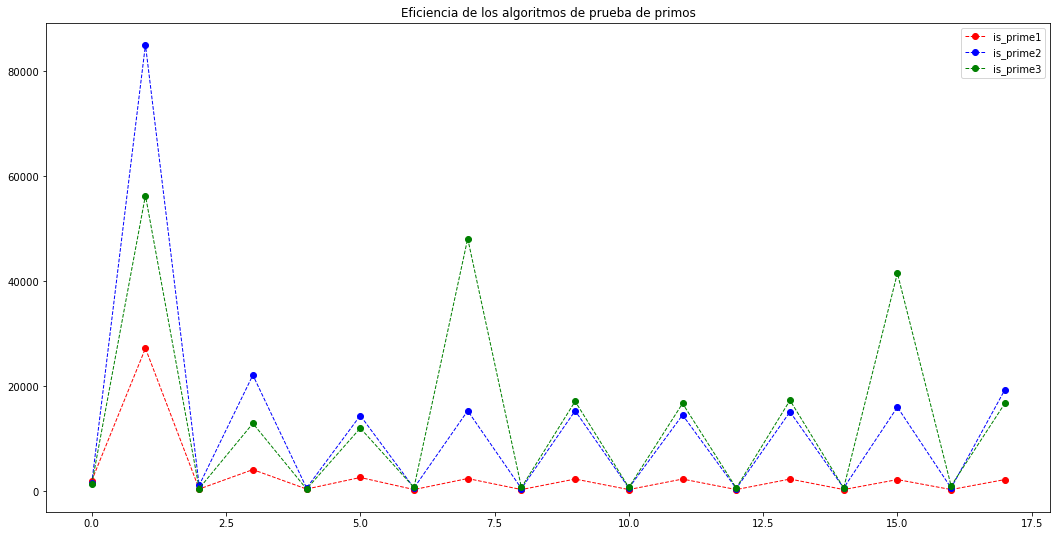

In [16]:
plt.figure(figsize=(18,9))
plt.title('Eficiencia de los algoritmos de prueba de primos')
plt.plot(t1, 'ro--', color = 'red', linewidth=1, label = 'is_prime1')
plt.plot(t2, 'ro--', color = 'blue', linewidth=1, label = 'is_prime2')
plt.plot(t3, 'ro--', color = 'green', linewidth=1, label = 'is_prime3')
plt.legend()
plt.show()

## Buscar Primos

In [17]:
def find_primes(ns: int, nf:int) -> list:
    
    primes = []
    
    for i in range(ns, nf + 1):
        if is_prime1(i):
            primes.append(i)
    
    return primes

In [18]:
def find_first_primes(n: int) -> list:
    if n <= 0:
        return []
    
    primes = [2]

    if n == 1:
        return primes
    
    count = 3
    while len(primes) < n:
        
        if is_prime1(count):
            primes.append(count)
        
        count += 2

    return primes

In [19]:
ns = 1
nf = 20

In [20]:
find_primes(ns, nf)

[2, 3, 5, 7, 11, 13, 17, 19]

In [21]:
n = 20

find_first_primes(n)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

## Primos Gemelos

In [30]:
def twins_primes(ns: int, nf: int) -> list:
    twins_primes = []

    primes = np.array(find_primes(ns, nf))

    if len(primes) < 2:
        return []

    position = np.diff(primes)
    
    index = 0
    while index < len(position) - 1:
        tmp = []
        if position[index] == 2:
            tmp.append(primes[index])
            tmp.append(primes[index + 1])
            twins_primes.append(tmp)
        
        index += 1

    return twins_primes


In [32]:
twins_primes(2, 100)

[[3, 5], [5, 7], [11, 13], [17, 19], [29, 31], [41, 43], [59, 61], [71, 73]]